<a href="https://colab.research.google.com/github/plaban1981/Dphi_hackathon/blob/main/Data_Sprint_49_Hospital_Patient_Survival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

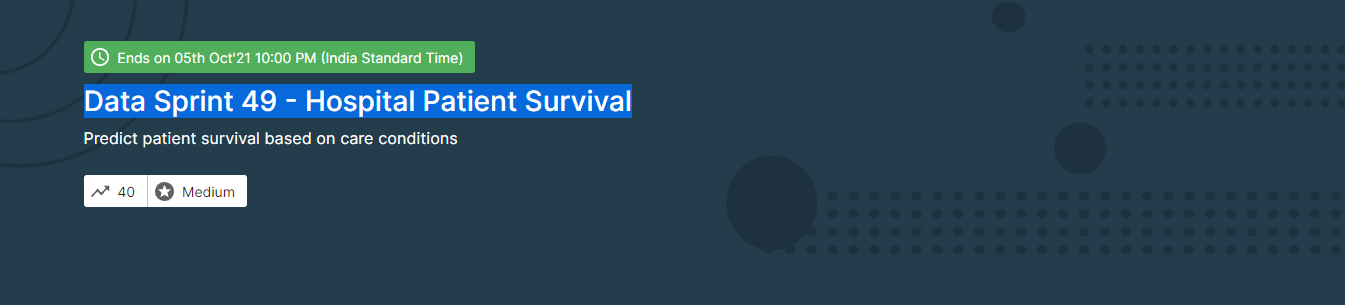

## Problem Statement 
The objective of the sprint is to predict the chances of survival of the patient after a year of treatment.

## Target Description 

The dataset contains the patient records collected from a hospital. The "Survived_1_year" column is a target variable that has binary entries (0 or 1).

* **Survived_1_year == 0**, implies that the patient did not survive after 1 year of treatment

* **Survived_1_year == 1**, implies that the patient survived after 1 year of treatment

## Data Description:

* ID_Patient_Care_Situation: Care situation of a patient during treatment

* Diagnosed_Condition: The diagnosed condition of the patient

* ID_Patient: Patient identifier number

* Treatment_with_drugs: Class of drugs used during treatment

* Survived_1_year: If the patient survived after one year (0 means did not survive; 1 means survived)

* Patient_Age: Age of the patient

* Patient_Body_Mass_Index: A calculated value based on the patient’s weight, height, etc.

* Patient_Smoker: If the patient was a smoker or not

* Patient_Rural_Urban: If the patient stayed in a Rural or Urban part of the country

* Columns A, B, C, D, E, F, Z correspond to whether a patient has such a previous health condition or not. With entry 0 corresponding to no such previous condition and 1 corresponds to having such a previous condition. 

* 'Number_of_prev_cond'. Corresponds to the total number of previous health conditions

## Evaluation Metrics

 "F1 score * 100" is used as an evaluation metric 

## Import Data

In [ ]:
from google.colab import files
files.upload()

Saving testing_data.csv to testing_data.csv
Saving training_data.csv to training_data.csv


{'testing_data.csv': b'ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond\r\n24206,35,4640,DX5 ,65,20.71036487265461,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0\r\n32827,30,3214,dx1 ,2,24.250219409599403,NO ,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0\r\n3694,46,3564,dx6 ,1,27.139276052056022,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0\r\n7164,44,5176,DX1 ,29,29.19175910436409,NO ,RURAL,Stable,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0\r\n1259,30,1101,DX5 ,51,20.84414616039289,NO,URBAN,Stable,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0\r\n4814,48,2144,Dx6,58,25.35747943160096,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0\r\n17277,30,10244,DX3,16,22.004283749139752,NO,URBAN,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0\r\n27122,35,8269,DX2 DX3,29,22.20945623130796,NO,RURAL,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0\r\n21758,30,1131,Dx1 ,3,27.71264993944242,

## Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
train  = pd.read_csv("/content/training_data.csv")
test = pd.read_csv("/content/testing_data.csv")

In [ ]:
train.shape,test.shape

((25079, 18), (9330, 17))

In [ ]:
train.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,16201,47,8433,DX2,60,21.655523,NO,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
1,9421,3,2972,DX6,2,28.852743,NO,RURAL,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0
2,16205,7,8608,Dx6,20,26.179725,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
3,5582,31,10074,dx6,8,22.638945,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
4,20880,43,7462,dx1,53,21.326131,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


## Train Summary Statistics

In [ ]:
train.describe()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
count,25079.000000,25079.000000,25079.000000,25079.000000,25079.000000,23723.000000,23723.000000,23723.000000,23723.000000,23723.000000,23723.000000,23723.000000,23723.000000,25079.000000
mean,16509.925396,26.382631,6237.758523,33.193548,23.439952,0.894111,0.136028,0.183409,0.083716,0.396240,0.054420,0.000337,1.748261,0.634316
std,9536.958469,15.096967,3603.338849,19.507617,3.778849,0.307702,0.342826,0.387009,0.276968,0.489126,0.226849,0.018361,0.770324,0.481631
min,1.000000,0.000000,1.000000,0.000000,1.089300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,8220.000000,13.000000,3125.000000,16.000000,20.205050,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,16466.000000,26.000000,6228.000000,33.000000,23.369168,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
75%,24784.000000,40.000000,9356.500000,50.000000,26.730785,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000
max,33013.000000,52.000000,12514.000000,142.000000,29.999579,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000


## Train data Types

In [ ]:
train.dtypes

ID_Patient_Care_Situation      int64
Diagnosed_Condition            int64
Patient_ID                     int64
Treated_with_drugs            object
Patient_Age                    int64
Patient_Body_Mass_Index      float64
Patient_Smoker                object
Patient_Rural_Urban           object
Patient_mental_condition      object
A                            float64
B                            float64
C                            float64
D                            float64
E                            float64
F                            float64
Z                            float64
Number_of_prev_cond          float64
Survived_1_year                int64
dtype: object

In [ ]:
train.isnull().sum()[train.isnull().sum() > 0]

Treated_with_drugs        8
A                      1356
B                      1356
C                      1356
D                      1356
E                      1356
F                      1356
Z                      1356
Number_of_prev_cond    1356
dtype: int64

In [ ]:
train[train.A.isnull()]

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
45,29462,19,3231,DX6,50,27.994080,NO,RURAL,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
61,5332,46,3161,DX2 DX5,18,21.713657,NO,URBAN,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
76,19576,35,9364,DX6,18,20.125493,NO,RURAL,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
86,32024,31,3154,DX3 DX5,16,27.182629,YES,RURAL,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
133,10359,52,10544,Dx6,27,20.167178,YES,RURAL,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24963,10645,46,10108,DX1 DX2,55,18.694524,YES,RURAL,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
24973,18473,23,4635,DX6,5,25.445119,NO,RURAL,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
24989,12134,38,3462,Dx6,17,20.096695,NO,RURAL,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
24999,1351,45,5898,DX4,33,25.748274,YES,RURAL,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


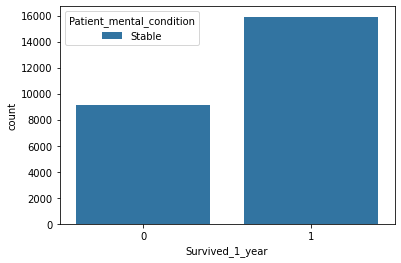

In [ ]:
sns.countplot(x='Survived_1_year',data=train,hue="Patient_mental_condition")

In [ ]:
sns.countplot(x='Survived_1_year',data=train,hue="Patient_mental_condition")

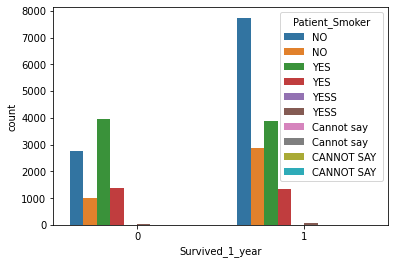

In [ ]:
sns.countplot(x='Survived_1_year',data=train,hue="Patient_Smoker")

In [ ]:
train.Patient_Smoker.unique()

array(['NO', 'NO ', 'YES', 'YES ', 'YESS ', 'YESS', 'Cannot say ',
       'Cannot say', 'CANNOT SAY ', 'CANNOT SAY'], dtype=object)

In [ ]:
def repl_val(x):
  if x == 'NO ':
    return 'NO'
  elif (x == 'YES ') or (x == 'YESS ') or (x == 'YESS'):
    return 'YES'
  elif x == 'Cannot say ' or (x == 'CANNOT SAY ') or (x == 'CANNOT SAY' ):
    return 'Cannot say'
  else:
    return x


In [ ]:
train['Patient_Smoker'] = train['Patient_Smoker'].map(repl_val)

In [ ]:
test['Patient_Smoker'] = test['Patient_Smoker'].map(repl_val)

In [ ]:
train['Patient_Smoker'].unique()

array(['NO', 'YES', 'Cannot say'], dtype=object)

In [ ]:
test['Patient_Smoker'].unique()

array(['NO', 'YES'], dtype=object)

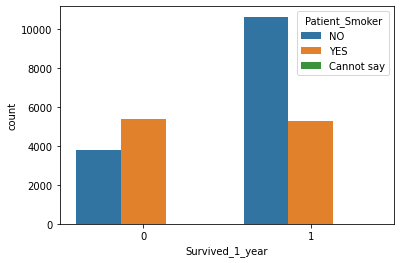

In [ ]:
sns.countplot(x='Survived_1_year',data=train,hue="Patient_Smoker")

In [ ]:
train['Treated_with_drugs'].unique()

array(['DX2', 'DX6', 'Dx6', 'dx6 ', 'dx1', 'dx1 dx3 dx4 ', 'DX5 ', 'dx2 ',
       'dx6', 'DX2 DX5 ', 'DX6 ', 'DX1', 'DX3 DX5', 'DX1 DX3', 'DX3 DX4 ',
       'Dx3', 'DX2 DX3', 'DX1 ', 'DX3', 'dx4', 'Dx2', 'Dx1', 'dx1 ',
       'DX1 DX2 DX3 DX5', 'Dx1 dx3', 'Dx5', 'DX2 ', 'DX4 ', 'DX4', 'dx3 ',
       'DX3 DX4 DX5 ', 'DX1 DX3 ', 'DX2 DX5', 'dx3', 'DX1 DX5', 'DX2 DX4',
       'dx2 dx3 ', 'dx2', 'DX3 DX5 ', 'DX5', 'DX2 DX3 DX4 ', 'DX4 DX5 ',
       'DX3 ', 'DX1 DX5 ', 'dx5', 'Dx4', 'DX1 DX3 DX5', 'DX1 DX4 ',
       'DX4 DX5', 'dx4 dx5', 'DX1 DX2 ', 'DX1 DX3 DX5 ', 'dx1 dx4',
       'dx4 dx5 ', 'Dx1 dx4 ', 'Dx1 dx2 dx4 dx5 ', 'DX1 DX2', 'Dx4 dx5',
       'DX1 DX3 DX4', 'DX1 DX2 DX3', 'Dx1 dx2', 'DX1 DX4 DX5 ',
       'Dx1 dx2 ', 'DX1 DX4', 'dx2 dx5', 'dx3 dx4', 'DX3 DX4', 'dx2 dx4',
       'Dx2 ', 'DX3 DX4 DX5', 'Dx5 ', 'Dx1 dx3 ', 'dx3 dx5', 'Dx6 ',
       'DX1 DX3 DX4 ', 'DX1 DX2 DX4', 'dx5 ', 'DX2 DX4 ', 'DX1 DX4 DX5',
       'Dx1 dx2 dx3 dx5', 'dx1 dx3 dx5 ', 'Dx2 dx5', 'dx2 dx3 dx4 ',


## Convert all values to lowercase and strip spaces

In [ ]:
def format_value(x):
  x = str(x).strip()
  x = x.lower()
  return x

In [ ]:
train['Treated_with_drugs'] = train['Treated_with_drugs'].map(format_value)
test['Treated_with_drugs'] = test['Treated_with_drugs'].map(format_value)

In [ ]:
train['Treated_with_drugs'].unique()

array(['dx2', 'dx6', 'dx1', 'dx1 dx3 dx4', 'dx5', 'dx2 dx5', 'dx3 dx5',
       'dx1 dx3', 'dx3 dx4', 'dx3', 'dx2 dx3', 'dx4', 'dx1 dx2 dx3 dx5',
       'dx3 dx4 dx5', 'dx1 dx5', 'dx2 dx4', 'dx2 dx3 dx4', 'dx4 dx5',
       'dx1 dx3 dx5', 'dx1 dx4', 'dx1 dx2', 'dx1 dx2 dx4 dx5',
       'dx1 dx2 dx3', 'dx1 dx4 dx5', 'dx1 dx2 dx4', 'dx1 dx2 dx5',
       'dx2 dx4 dx5', 'dx2 dx3 dx5', 'nan', 'dx1 dx2 dx3 dx4',
       'dx1 dx3 dx4 dx5', 'dx2 dx3 dx4 dx5', 'dx1 dx2 dx3 dx4 dx5'],
      dtype=object)

## Check for null values in test data

In [ ]:
test.isnull().sum()[test.isnull().sum() > 0]

Series([], dtype: int64)

In [ ]:
test['Treated_with_drugs'].unique()

array(['dx5', 'dx1', 'dx6', 'dx3', 'dx2 dx3', 'dx4', 'dx2', 'dx3 dx5',
       'dx1 dx4', 'dx1 dx2', 'dx1 dx3 dx4 dx5', 'dx1 dx3 dx4', 'dx2 dx5',
       'dx4 dx5', 'dx3 dx4', 'dx2 dx3 dx4', 'dx1 dx3', 'dx2 dx4',
       'dx1 dx3 dx5', 'dx1 dx5', 'dx1 dx2 dx4', 'dx2 dx4 dx5',
       'dx3 dx4 dx5', 'dx1 dx2 dx5', 'dx2 dx3 dx5', 'dx1 dx2 dx3',
       'dx1 dx2 dx4 dx5', 'dx1 dx2 dx3 dx4 dx5', 'dx1 dx2 dx3 dx4',
       'dx1 dx4 dx5', 'dx2 dx3 dx4 dx5', 'dx1 dx2 dx3 dx5'], dtype=object)

In [ ]:
df1 = train['Treated_with_drugs'].str.split(" ", expand=True) 


In [ ]:
df2 = test['Treated_with_drugs'].str.split(" ", expand=True) 

In [ ]:
df1

,0,1,2,3,4
0,dx2,None,None,None,None
1,dx6,None,None,None,None
2,dx6,None,None,None,None
3,dx6,None,None,None,None
4,dx1,None,None,None,None
...,...,...,...,...,...
25074,dx3,dx4,None,None,None
25075,dx2,None,None,None,None
25076,dx4,dx5,None,None,None
25077,dx5,None,None,None,None


In [ ]:
df2

,0,1,2,3,4
0,dx5,None,None,None,None
1,dx1,None,None,None,None
2,dx6,None,None,None,None
3,dx1,None,None,None,None
4,dx5,None,None,None,None
...,...,...,...,...,...
9325,dx6,None,None,None,None
9326,dx6,None,None,None,None
9327,dx6,None,None,None,None
9328,dx6,None,None,None,None


In [ ]:
df1 = df1.rename(columns={0:'T1',1:'T2',2:'T3',3:'T4',4:'T5'})
df1

,T1,T2,T3,T4,T5
0,dx2,None,None,None,None
1,dx6,None,None,None,None
2,dx6,None,None,None,None
3,dx6,None,None,None,None
4,dx1,None,None,None,None
...,...,...,...,...,...
25074,dx3,dx4,None,None,None
25075,dx2,None,None,None,None
25076,dx4,dx5,None,None,None
25077,dx5,None,None,None,None


In [ ]:
df2 = df2.rename(columns={0:'T1',1:'T2',2:'T3',3:'T4',4:'T5'})
df2

,T1,T2,T3,T4,T5
0,dx5,None,None,None,None
1,dx1,None,None,None,None
2,dx6,None,None,None,None
3,dx1,None,None,None,None
4,dx5,None,None,None,None
...,...,...,...,...,...
9325,dx6,None,None,None,None
9326,dx6,None,None,None,None
9327,dx6,None,None,None,None
9328,dx6,None,None,None,None


In [ ]:
for col in df1.columns:
  df1[col] = df1[col].fillna('missing')

In [ ]:
df1

,T1,T2,T3,T4,T5
0,dx2,missing,missing,missing,missing
1,dx6,missing,missing,missing,missing
2,dx6,missing,missing,missing,missing
3,dx6,missing,missing,missing,missing
4,dx1,missing,missing,missing,missing
...,...,...,...,...,...
25074,dx3,dx4,missing,missing,missing
25075,dx2,missing,missing,missing,missing
25076,dx4,dx5,missing,missing,missing
25077,dx5,missing,missing,missing,missing


In [ ]:
for col in df2.columns:
  df2[col] = df2[col].fillna('missing')

In [ ]:
df2

,T1,T2,T3,T4,T5
0,dx5,missing,missing,missing,missing
1,dx1,missing,missing,missing,missing
2,dx6,missing,missing,missing,missing
3,dx1,missing,missing,missing,missing
4,dx5,missing,missing,missing,missing
...,...,...,...,...,...
9325,dx6,missing,missing,missing,missing
9326,dx6,missing,missing,missing,missing
9327,dx6,missing,missing,missing,missing
9328,dx6,missing,missing,missing,missing


In [ ]:
train_new = pd.concat([df1,train],axis=1)

In [ ]:
train_new.head()

,T1,T2,T3,T4,T5,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,dx2,missing,missing,missing,missing,16201,47,8433,dx2,60,21.655523,NO,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
1,dx6,missing,missing,missing,missing,9421,3,2972,dx6,2,28.852743,NO,RURAL,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0
2,dx6,missing,missing,missing,missing,16205,7,8608,dx6,20,26.179725,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
3,dx6,missing,missing,missing,missing,5582,31,10074,dx6,8,22.638945,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
4,dx1,missing,missing,missing,missing,20880,43,7462,dx1,53,21.326131,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


In [ ]:
train_new.columns

Index(['T1', 'T2', 'T3', 'T4', 'T5', 'ID_Patient_Care_Situation',
       'Diagnosed_Condition', 'Patient_ID', 'Treated_with_drugs',
       'Patient_Age', 'Patient_Body_Mass_Index', 'Patient_Smoker',
       'Patient_Rural_Urban', 'Patient_mental_condition', 'A', 'B', 'C', 'D',
       'E', 'F', 'Z', 'Number_of_prev_cond', 'Survived_1_year'],
      dtype='object')

In [ ]:
test_new = pd.concat([df2,test],axis=1)

In [ ]:
cols_to_drop = ['ID_Patient_Care_Situation','Patient_mental_condition','Treated_with_drugs','A', 'B', 'C', 'D','E', 'F', 'Z']

In [ ]:
train_new = train_new.drop(cols_to_drop,axis=1)
test_new = test_new.drop(cols_to_drop,axis=1)

In [ ]:
train_new.shape,test_new.shape

((25079, 13), (9330, 12))

In [ ]:
train_new.head()

,T1,T2,T3,T4,T5,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Number_of_prev_cond,Survived_1_year
0,dx2,missing,missing,missing,missing,47,8433,60,21.655523,NO,URBAN,2.0,1
1,dx6,missing,missing,missing,missing,3,2972,2,28.852743,NO,RURAL,3.0,0
2,dx6,missing,missing,missing,missing,7,8608,20,26.179725,NO,RURAL,2.0,1
3,dx6,missing,missing,missing,missing,31,10074,8,22.638945,NO,RURAL,2.0,0
4,dx1,missing,missing,missing,missing,43,7462,53,21.326131,NO,RURAL,1.0,1


In [ ]:
cat_cols  = []
for col in train_new.columns:
  print(train_new[col].dtypes)
  if train_new[col].dtypes == 'object':
    cat_cols.append(col)

object
object
object
object
object
int64
int64
int64
float64
object
object
float64
int64


In [ ]:
cat_cols

['T1', 'T2', 'T3', 'T4', 'T5', 'Patient_Smoker', 'Patient_Rural_Urban']

In [ ]:
!pip install catboost

     |████████████████████████████████| 76.4 MB 39 kB/s 


In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import *
from sklearn.model_selection import *
#
from hyperopt import hp, fmin, tpe, Trials
from hyperopt.pyll.base import scope
from functools import partial
from sklearn.metrics import f1_score
#
from sklearn.model_selection import StratifiedKFold

In [ ]:
def optimize(params, x, y):
  
  # initialize model with current parameters
  model = CatBoostClassifier(**params,eval_metric='AUC',
                             auto_class_weights='Balanced',verbose=0,
                             task_type='GPU')
  #model = RandomForestClassifier(**params)
  # initialize stratified k-fold
  kf = StratifiedKFold(n_splits=5)
  # initialize accuracy list
  accuracies = []
  # loop over all folds
  for idx in kf.split(X=x, y=y):
    train_idx, test_idx = idx[0], idx[1]
    xtrain,xtest = x.iloc[train_idx],x.iloc[test_idx]
    ytrain,ytest = y[train_idx],y[test_idx]
    # fit model for current fold
    model.fit(xtrain, ytrain,cat_features =cat_cols)
    #model.fit(xtrain, ytrain)
    #create predictions
    preds = model.predict(xtest)
    # calculate and append accuracy
    fold_accuracy = f1_score(ytest,preds)
    accuracies.append(fold_accuracy)
  # return negative accuracy
  return -1 * np.mean(accuracies)

## Parameter space for CatBoostClassifier

In [ ]:
# define a parameter space
# now we use hyperopt
param_space = {
# quniform gives round(uniform(low, high) / q) * q
# we want int values for depth and estimators
"max_depth": scope.int(hp.choice("max_depth", [3,5,7,8])),
#CatBoostError: only one of the parameters iterations, n_estimators, num_boost_round, num_trees should be initialized.
#"n_estimators": scope.int(hp.quniform("n_estimators", 100, 1500, 1)),
# choice chooses from a list of values
"learning_rate": hp.loguniform('learning_rate', -5.0, -2),
# uniform chooses a value between two values
"random_state": scope.int(hp.quniform("random_state", 40, 100,10)),
"num_boost_round": scope.int(hp.choice("num_boost_round", [500,1000,1500,2000]))
}

In [ ]:
param_space

{'learning_rate': <hyperopt.pyll.base.Apply at 0x7f5b1ad4d250>,
 'max_depth': <hyperopt.pyll.base.Apply at 0x7f5b1ad4d090>,
 'num_boost_round': <hyperopt.pyll.base.Apply at 0x7f5b1ad4d6d0>,
 'random_state': <hyperopt.pyll.base.Apply at 0x7f5b1ad4d450>}

In [ ]:
X = train_new.drop('Survived_1_year',axis=1)
Y = train_new['Survived_1_year']

## HyperParameter optimization using hyperopt

In [179]:
# partial function
optimization_function = partial(optimize,x=X,y=Y)
# initialize trials to keep logging information
trials = Trials()
# run hyperopt
hopt = fmin(fn=optimization_function,
             space=param_space,
            algo=tpe.suggest,
            max_evals=15,
            trials=trials
           )

100%|██████████| 15/15 [1:27:48<00:00, 351.24s/it, best loss: -0.8510242435457529]


In [180]:
print(f" parameters for CatBoostClassifier {hopt}")

 parameters for CatBoostClassifier {'learning_rate': 0.11109501483572883, 'max_depth': 2, 'num_boost_round': 2, 'random_state': 70.0}


Running 1 iteration
0.8482556243886534
0.8482459597950335
Running 2 iteration
0.846822130772748
0.8485565857828631
Running 3 iteration
0.846218980003908
0.8446209864283349
Running 4 iteration
0.8483745123537062
0.845913179507235
Running 5 iteration
0.8484254540702993
0.8462908011869438
-----------KFOLD--------------
AxesSubplot(0.125,0.125;0.775x0.755)
0.8114682191562326 0.8163330409123535 0.8138681858057406


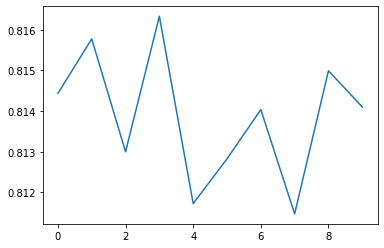

In [184]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
iterations = 5
scores = []
scores_val = []
target = Y
temp = X
predictions = []
for i in range(iterations):
    print(f'Running {i+1} iteration')
    
    kfold = StratifiedKFold(n_splits = 2, shuffle=True)
    
    for train_index,test_index in kfold.split(temp,target):
        xtrain,xtest = temp[temp.index.isin(train_index)],temp[temp.index.isin(test_index)]
        ytrain,ytest = target[train_index],target[test_index]
        
        #model  = CatBoostClassifier(learning_rate = 0.04627007502666947, n_estimators =1483, random_state = 60)    
        model = CatBoostClassifier(max_depth=2,
                                   learning_rate = 0.11109501483572883,
                                   random_state=70,
                                   eval_metric='AUC',
                                   auto_class_weights='Balanced',
                                   num_boost_round=2000,verbose=0)
        model.fit(xtrain,ytrain,cat_features=cat_cols)
            
        preds = model.predict(xtest)
        
        print(f1_score(ytest,preds))
        scores.append(accuracy_score(ytest,preds))
        #
#
#        
print('-----------KFOLD--------------')
print(sns.lineplot(x=[i for i in range(len(scores))],y=scores))
print(min(scores),max(scores),np.mean(scores))

In [183]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.10,stratify=Y,random_state=42)

In [186]:
model = CatBoostClassifier(max_depth=2,
                          learning_rate = 0.11109501483572883,
                          random_state=70,
                          eval_metric='AUC',
                          auto_class_weights='Balanced',
                          num_boost_round=2000,verbose=0)

#
model.fit(X_train,y_train,cat_features=cat_cols)
y_pred = model.predict(X_test)

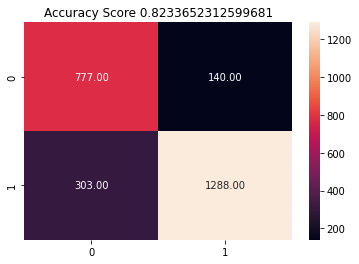

In [194]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test,y_pred)
sns.heatmap(cf,annot=True,fmt=".2f")
plt.title(f"Accuracy Score {accuracy_score(y_test,y_pred)}")
plt.show()

## Make predictions on test data

In [188]:
predictions = model.predict(test_new)

In [191]:
test['prediction'] = predictions

In [192]:
test[['prediction']].to_csv("patient_survival.csv",index=False)

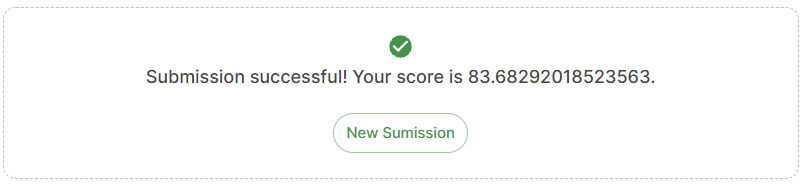

## Explainable AI

https://dphi.tech/notebooks/816/gunnika/shap-implementation?